In [62]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define the magnetic field function
def magnetic_field(x, y, z):
    # Define the magnetic field vector B = (Bx, By, Bz)
    Bx = 0
    By = 0
    Bz = 1  # Uniform magnetic field in the z-direction

    # Return the magnetic field vector as a tuple
    return Bx, By, Bz

# Define the electric field function
def electric_field(x, y, z):
    # Define the electric field vector E = (Ex, Ey, Ez)
    Ex = 0
    Ey = 0
    Ez = 0  # No electric field

    # Return the electric field vector as a tuple
    return Ex, Ey, Ez

# Define the Lorentz force function
def lorentz_force(q, v, B, E):
    # Define the Lorentz force vector F = (Fx, Fy, Fz)
    Fx = q * (E[0] + np.cross(v, B)[0])
    Fy = q * (E[1] + np.cross(v, B)[1])
    Fz = q * (E[2] + np.cross(v, B)[2])

    # Return the Lorentz force vector as a tuple
    return Fx, Fy, Fz

# Define the particle trajectory function
def particle_trajectory(q, m, x0, v0, dt, t_max):
    # Initialize the particle position and velocity
    x = np.array(x0, dtype=float)
    v = np.array(v0, dtype=float)

    # Initialize the time array
    t = np.arange(0, t_max, dt)

    # Initialize the arrays to store the particle position and velocity at each time step
    x_array = np.zeros((len(t)+1, 3))
    v_array = np.zeros((len(t)+1, 3))

    # Run the simulation
    for i in range(len(t)):
        # Compute the magnetic and electric fields at the current position
        B = np.array(magnetic_field(*x))
        E = np.array(electric_field(*x))

        # Compute the Lorentz force on the particle
        F = np.array(lorentz_force(q, v, B, E))

        # Update the particle position and velocity using the Euler method
        x += v * dt
        v += F / m * dt

        # Store the particle position and velocity in the arrays
        x_array[i] = x
        v_array[i] = v

    # Return the particle position and velocity arrays
    return x_array, v_array

# Define the animation function
def animate(i, x_array=None):
    # Clear the axes
    ax.clear()

    # Set the axis limits
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])

    # Set the axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Set the title
    ax.set_title('Charged Particle Spiraling Around Magnetic Field')

    # # Compute the particle trajectory
    x_array, v_array = particle_trajectory(q, m, x0, v0, dt, i * dt)

    # Plot the particle trajectory
    ax.plot(x_array[:i,0], x_array[:i,1], x_array[:i,2], color='red')

    # Plot the magnetic field lines
    x = np.linspace(-1, 1, 20)
    y = np.linspace(-1, 1, 20)
    z = np.linspace(-1, 1, 20)
    X, Y, Z = np.meshgrid(x, y, z)
    Bx, By, Bz = magnetic_field(X, Y, Z)
    B_norm = np.sqrt(Bx**2 + By**2 + Bz**2)
    # ax.quiver(X, Y, Z, Bx/B_norm, By/B_norm, Bz/B_norm, length=0.2, color='blue')


    # Plot the particle
    ax.scatter(x_array[i,0], x_array[i,1], x_array[i,2], color='green', s=50)

    # Adjust the viewing angle
    ax.view_init(elev=20, azim=i*4)

    # Return the plot
    return ax

[[ 1.00000000e-02  0.00000000e+00  1.00000000e-02]
 [ 2.00000000e-02 -1.00000000e-04  2.00000000e-02]
 [ 2.99990000e-02 -3.00000000e-04  3.00000000e-02]
 ...
 [-5.62739122e-01 -1.88790741e+00  9.99000000e+00]
 [-5.71618196e-01 -1.88228002e+00  1.00000000e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]


TypeError: 'Axes3D' object is not iterable

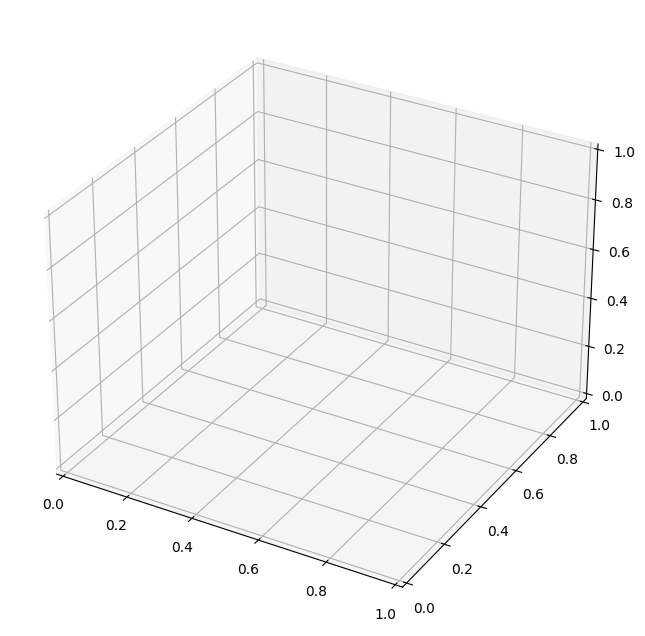

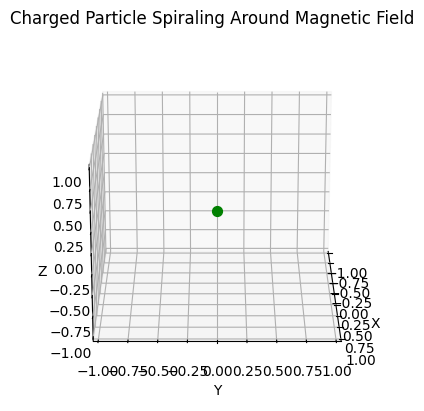

In [63]:
q = 1 # Charge of the particle (in Coulombs)
m = 1 # Mass of the particle (in kg)
x0 = [0, 0, 0] # Initial position of the particle (in meters)
v0 = [1.0, 0.0, 1.0] # Initial velocity of the particle (in meters per second)
dt = 0.01 # Time step of the simulation (in seconds)
t_max = 10 # Maximum time of the simulation (in seconds)

x_array, v_array = particle_trajectory(q, m, x0, v0, dt, t_max)

print(x_array)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

num_steps = 10
init = lambda: animate(0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


anim = animation.FuncAnimation(fig, animate, fargs=(x_array,), init_func=init, frames=num_steps, interval=20, blit=True)

anim.save('charged_particle_animation.mp4', writer=animation.FFMpegWriter(fps=30))

In [43]:
a, b = particle_trajectory(q, m, x0, v0, dt, t_max*100)

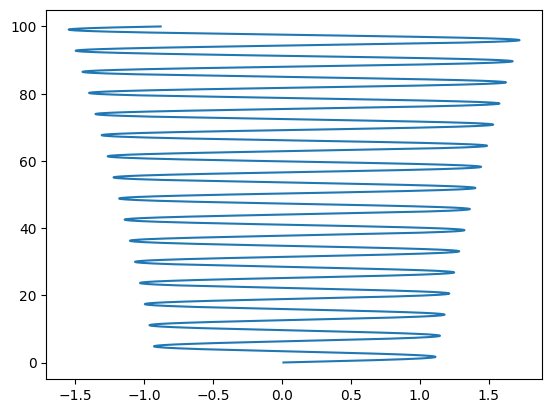

In [46]:
plt.plot(a[:10000,0], a[:10000,2])

In [32]:
# Initialize the particle position and velocity
x = np.array(x0, dtype=float)
v = np.array(v0, dtype=float)

# Initialize the time array
t = np.arange(0, t_max, dt)

# Initialize the arrays to store the particle position and velocity at each time step
x_array = np.zeros((len(t), 3), dtype=float)
v_array = np.zeros((len(t), 3), dtype=float)

# Run the simulation
for i in range(len(t)-len(t)+1):
    # Compute the magnetic and electric fields at the current position
    B = np.array(magnetic_field(*x))
    E = np.array(electric_field(*x))

    # Compute the Lorentz force on the particle
    F = np.array(lorentz_force(q, v, B, E))

    # Update the particle position and velocity using the Euler method
    x += v * dt
    v += F / m * dt

    # Store the particle position and velocity in the arrays
    x_array[i] = x
    v_array[i] = v

array([[0.001, 0.001, 0.001],
       [0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   ]])

In [17]:
v*dt

array([0.001, 0.   , 0.001])

In [21]:
x

array([0, 0, 0])

ValueError: operands could not be broadcast together with shapes (3,20,20,20) (3,) 

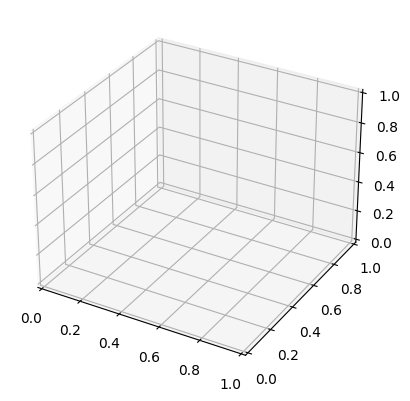

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the magnetic dipole field function
def magnetic_dipole_field(r, r0, m):
    mu_0 = 4 * np.pi * 1e-7 # magnetic constant
    R = r - r0
    r3 = np.sum(R**2)**(3/2)
    return mu_0 / (4 * np.pi) * (3 * np.outer(m, R) / r3 - np.outer(m, np.ones_like(R)) / r3**2)

# Define the magnetic field line function
def magnetic_field_line(r, r0, m, ds=0.01, nsteps=5000):
    B = magnetic_dipole_field(r, r0, m)
    B_norm = np.sqrt(np.sum(B**2))
    s = 0
    for i in range(nsteps):
        if np.sqrt(np.sum(r**2)) > 1e6:
            break
        dr = ds * B / B_norm
        r = r + dr
        B = magnetic_dipole_field(r, r0, m)
        B_norm = np.sqrt(np.sum(B**2))
        s += ds
        yield r

# Set up the plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# Define the position and moment of two magnetic dipoles
r1 = np.array([0, 0, 0])
r2 = np.array([10, 0, 0])
m1 = np.array([0, 0, 1])
m2 = np.array([0, 0, -1])

# Define the range of the plot
x, y, z = np.mgrid[-10:20:20j, -10:10:20j, -10:10:20j]
Bx, By, Bz = magnetic_dipole_field(np.array([x, y, z]), r1, m1) + magnetic_dipole_field(np.array([x, y, z]), r2, m2)
B = np.sqrt(Bx**2 + By**2 + Bz**2)

# Create the plot
ax.set_xlim(-10, 20)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Magnetic Field Lines')

# Draw the field lines
for r0 in [r1, r2]:
    for m in [m1, m2]:
        for r in magnetic_field_line(r0, r0, m):
            ax.plot([r[0]], [r[1]], [r[2]], color='b', alpha=0.1)

# Show the plot
plt.show()